In [207]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [208]:
election=pd.read_csv('ElectionData.csv')
election.head()

TimeElapsed                 time        territoryName  totalMandates  \
0            0  2019-10-06 20:10:02  Território Nacional              0   
1            0  2019-10-06 20:10:02  Território Nacional              0   
2            0  2019-10-06 20:10:02  Território Nacional              0   
3            0  2019-10-06 20:10:02  Território Nacional              0   
4            0  2019-10-06 20:10:02  Território Nacional              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   
2                226         3092                 1081        9652   
3                226         3092                 1081        9652   
4                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                   2.5       8874  ...                 52.66   
1                   2.5       8874  ...                 52.66   
2                   2.5       8874  ...                 52.66   
3                   2.5       8874  ...                 52.66   
4                   2.5       8874  ...                 52.66   

   pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                813743           428546       PS         0       38.29   
1                813743           428546  PPD/PSD         0       33.28   
2                813743           428546     B.E.         0        6.81   
3                813743           428546   CDS-PP         0        4.90   
4                813743           428546  PCP-PEV         0        4.59   

   validVotesPercentage   Votes  Hondt  FinalMandates  
0                 40.22  147993     94            106  
1                 34.95  128624     81             77  
2                  7.15   26307     16             19  
3                  5.14   18923     12              5  
4                  4.83   17757     11             12  

[5 rows x 28 columns]

In [209]:
df=pd.DataFrame(data=election)
df.tail()

TimeElapsed                 time territoryName  totalMandates  \
21638          265  2019-10-07 00:35:01         Viseu              8   
21639          265  2019-10-07 00:35:01         Viseu              8   
21640          265  2019-10-07 00:35:01         Viseu              8   
21641          265  2019-10-07 00:35:01         Viseu              8   
21642          265  2019-10-07 00:35:01         Viseu              8   

       availableMandates  numParishes  numParishesApproved  blankVotes  \
21638                  0          277                  277        4995   
21639                  0          277                  277        4995   
21640                  0          277                  277        4995   
21641                  0          277                  277        4995   
21642                  0          277                  277        4995   

       blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
21638                  2.81       3700  ...                 51.28   
21639                  2.81       3700  ...                 51.28   
21640                  2.81       3700  ...                 51.28   
21641                  2.81       3700  ...                 51.28   
21642                  2.81       3700  ...                 51.28   

       pre.subscribedVoters  pre.totalVoters  Party  Mandates  Percentage  \
21638                371931           190712     NC         0        0.19   
21639                371931           190712    PNR         0        0.18   
21640                371931           190712    MPT         0        0.14   
21641                371931           190712    PTP         0        0.13   
21642                371931           190712    JPP         0        0.07   

       validVotesPercentage  Votes  Hondt  FinalMandates  
21638                  0.20    332      0              0  
21639                  0.19    326      0              0  
21640                  0.15    256      0              0  
21641                  0.14    239      0              0  
21642                  0.07    118      0              0  

[5 rows x 28 columns]

In [210]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [211]:
df.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [212]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['TimeElapsed', 'totalMandates', 'availableMandates', 'numParishes',
        'numParishesApproved', 'blankVotes', 'nullVotes', 'subscribedVoters',
        'totalVoters', 'pre.blankVotes', 'pre.nullVotes',
        'pre.subscribedVoters', 'pre.totalVoters', 'Mandates', 'Votes', 'Hondt',
        'FinalMandates'],
       dtype='object'),
 dtype('float64'): Index(['blankVotesPercentage', 'nullVotesPercentage', 'votersPercentage',
        'pre.blankVotesPercentage', 'pre.nullVotesPercentage',
        'pre.votersPercentage', 'Percentage', 'validVotesPercentage'],
       dtype='object'),
 dtype('O'): Index(['time', 'territoryName', 'Party'], dtype='object')}

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
TimeElapsed                 21643 non-null int64
time                        21643 non-null object
territoryName               21643 non-null object
totalMandates               21643 non-null int64
availableMandates           21643 non-null int64
numParishes                 21643 non-null int64
numParishesApproved         21643 non-null int64
blankVotes                  21643 non-null int64
blankVotesPercentage        21643 non-null float64
nullVotes                   21643 non-null int64
nullVotesPercentage         21643 non-null float64
votersPercentage            21643 non-null float64
subscribedVoters            21643 non-null int64
totalVoters                 21643 non-null int64
pre.blankVotes              21643 non-null int64
pre.blankVotesPercentage    21643 non-null float64
pre.nullVotes               21643 non-null int64
pre.nullVotesPercentage     21643 non-null float

In [214]:
df.shape

(21643, 28)

In [215]:
df.describe()

TimeElapsed  totalMandates  availableMandates   numParishes  \
count  21643.000000   21643.000000       21643.000000  21643.000000   
mean     133.146052      11.544795          11.499284    309.956013   
std       77.651193      31.314567          31.738783    659.055911   
min        0.000000       0.000000           0.000000     54.000000   
25%       65.000000       1.000000           0.000000     75.000000   
50%      135.000000       4.000000           3.000000    147.000000   
75%      200.000000       9.000000           9.000000    242.000000   
max      265.000000     226.000000         226.000000   3092.000000   

       numParishesApproved     blankVotes  blankVotesPercentage     nullVotes  \
count         21643.000000   21643.000000          21643.000000  21643.000000   
mean            261.090237    8875.066673              2.621629   6148.068752   
std             583.377428   21484.874088              0.795289  14735.469269   
min               3.000000      19.000000              0.530000     39.000000   
25%              67.000000    1188.000000              2.230000   1094.000000   
50%             120.000000    2998.000000              2.640000   2232.000000   
75%             208.000000    6889.000000              2.980000   4121.000000   
max            3092.000000  129599.000000              5.460000  88539.000000   

       nullVotesPercentage  votersPercentage  ...  pre.nullVotesPercentage  \
count         21643.000000      21643.000000  ...             21643.000000   
mean              1.961471         51.983722  ...                 1.777442   
std               0.375250          4.854380  ...                 0.388798   
min               1.340000         35.980000  ...                 1.140000   
25%               1.720000         50.290000  ...                 1.520000   
50%               1.870000         53.130000  ...                 1.690000   
75%               2.230000         54.550000  ...                 1.970000   
max               3.350000         59.870000  ...                 3.120000   

       pre.votersPercentage  pre.subscribedVoters  pre.totalVoters  \
count          21643.000000          2.164300e+04     2.164300e+04   
mean              54.549372          6.378503e+05     3.594932e+05   
std                4.964948          1.544418e+06     8.763729e+05   
min               40.870000          6.383000e+03     3.215000e+03   
25%               51.210000          1.289260e+05     6.964400e+04   
50%               56.260000          2.284970e+05     1.102730e+05   
75%               58.220000          3.933140e+05     2.276200e+05   
max               62.580000          9.439701e+06     5.380451e+06   

           Mandates    Percentage  validVotesPercentage         Votes  \
count  21643.000000  21643.000000          21643.000000  2.164300e+04   
mean       0.565495      4.968484              5.207232  1.585209e+04   
std        4.421804     10.379967             10.881108  9.310605e+04   
min        0.000000      0.020000              0.020000  1.000000e+00   
25%        0.000000      0.220000              0.230000  2.360000e+02   
50%        0.000000      0.620000              0.650000  7.900000e+02   
75%        0.000000      3.010000              3.160000  4.510000e+03   
max      106.000000     49.110000             51.420000  1.866407e+06   

              Hondt  FinalMandates  
count  21643.000000   21643.000000  
mean       1.126138       1.126138  
std        6.293552       6.872644  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max       94.000000     106.000000  

[8 rows x 25 columns]

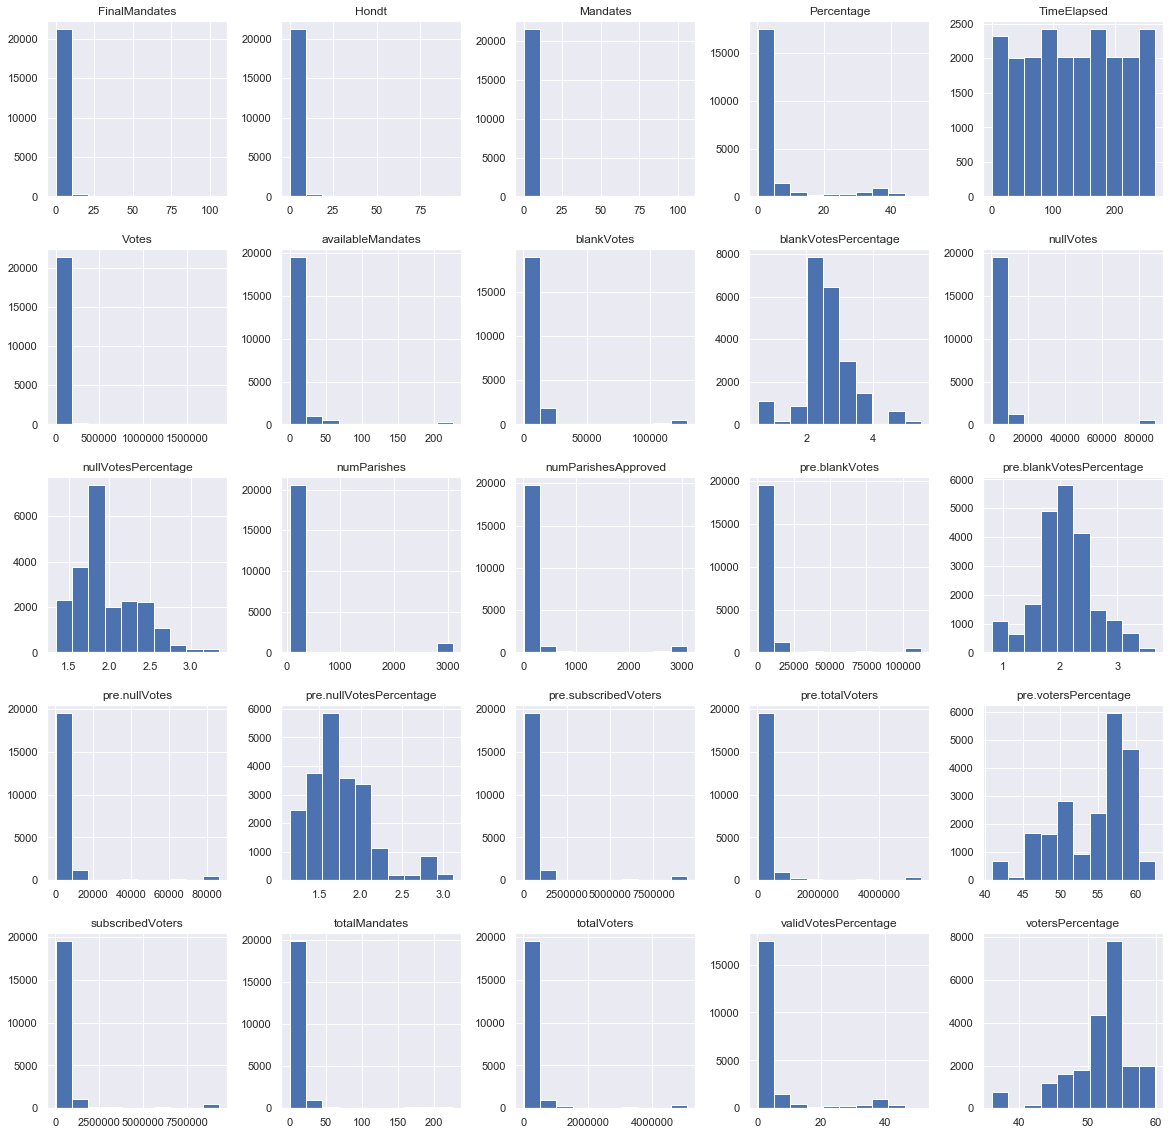

In [216]:
df.hist(figsize=(20,20))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x261e4b034c8>,
 'caps': [<matplotlib.lines.Line2D at 0x261e4b03d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x261e4b02a48>],
 'medians': [<matplotlib.lines.Line2D at 0x261e4b06bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x261e4b09a48>],
 'means': []}

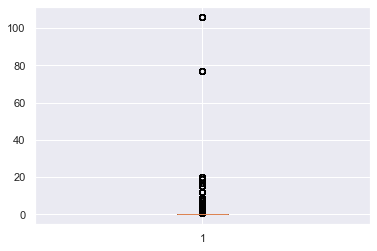

In [217]:
plt.boxplot(df['FinalMandates'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x261e4b26fc8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x261e4b26c88>,
 'cmins': <matplotlib.collections.LineCollection at 0x261e4b2a1c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x261e4b2d908>}

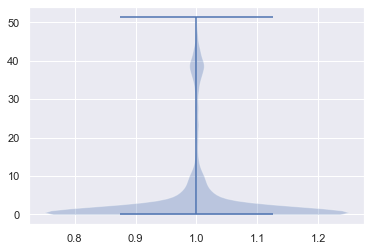

In [218]:
plt.violinplot(df['validVotesPercentage'])

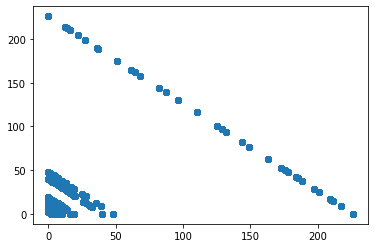

In [13]:
plt.scatter('totalMandates','availableMandates',data=df)

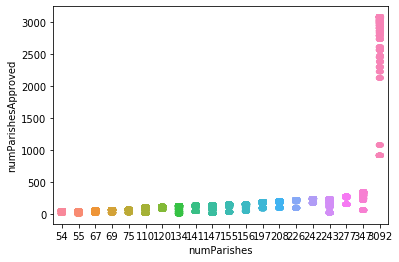

In [14]:
sns.stripplot('numParishes','numParishesApproved',data=df)

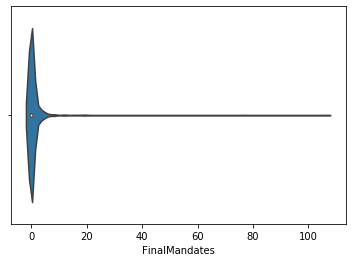

In [16]:
sns.violinplot(df['FinalMandates'])

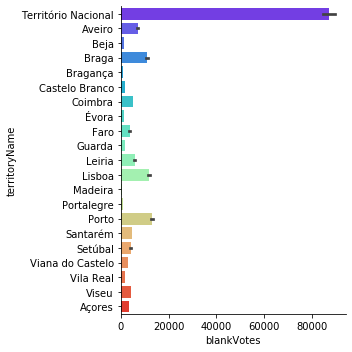

In [19]:
sns.catplot('blankVotes','territoryName',data=df,height=5,palette='rainbow',kind='bar')

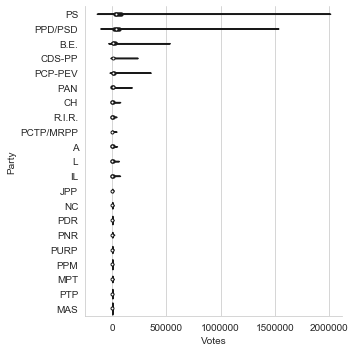

In [23]:
sns.set_style('whitegrid')
sns.catplot('Votes','Party',data=df,height=5,palette='PuBuGn',kind='violin')

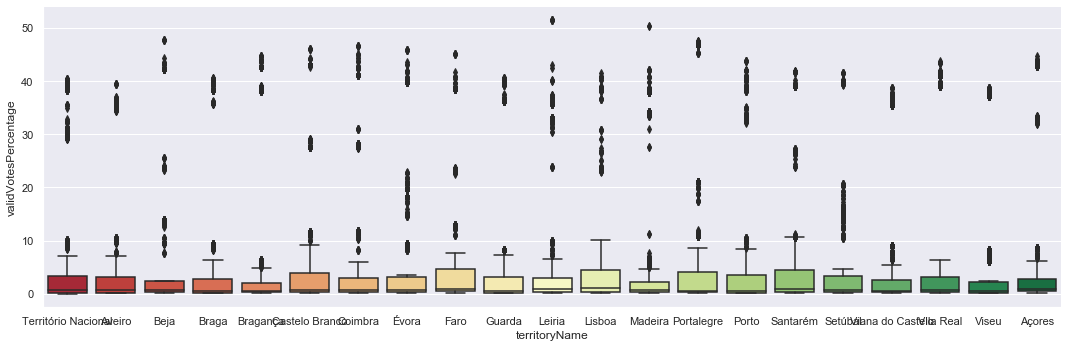

In [26]:
sns.set(style='darkgrid')
sns.catplot('territoryName','validVotesPercentage',height=5,aspect=3,data=df,palette='RdYlGn',kind='box')

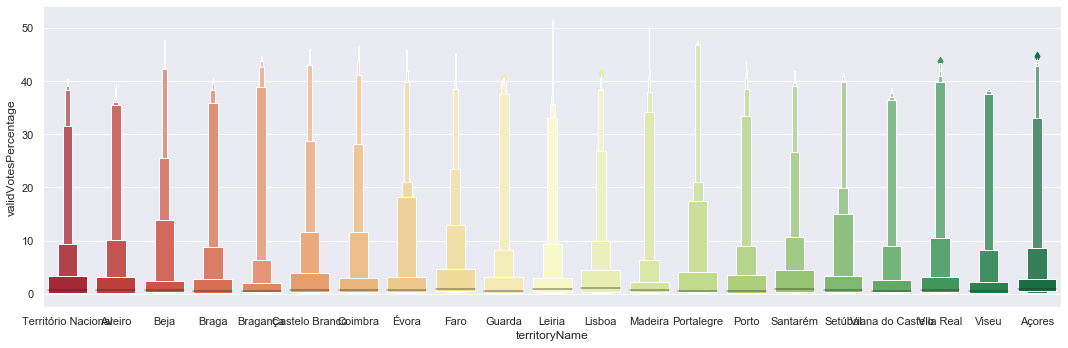

In [27]:
sns.catplot('territoryName','validVotesPercentage',height=5,aspect=3,data=df,palette='RdYlGn',kind='boxen')

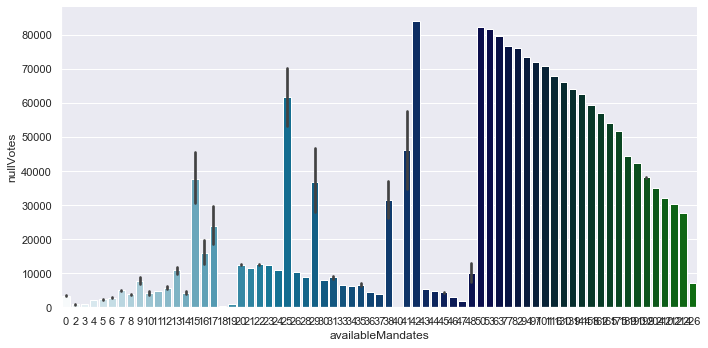

In [32]:
sns.catplot('availableMandates','nullVotes',data=df,aspect=2,palette='ocean_r',kind='bar')

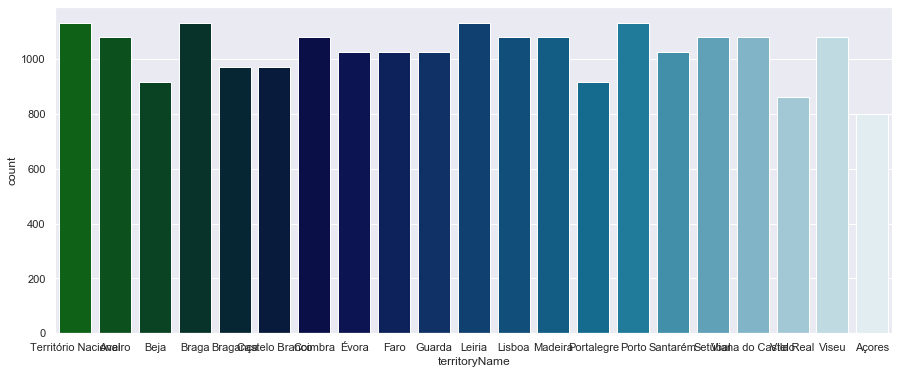

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(df['territoryName'],palette='ocean')

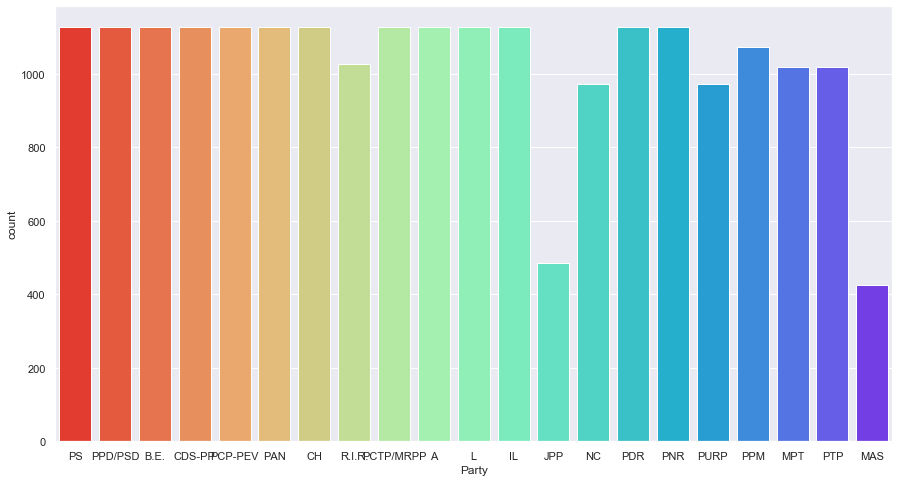

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(df['Party'],palette='rainbow_r')

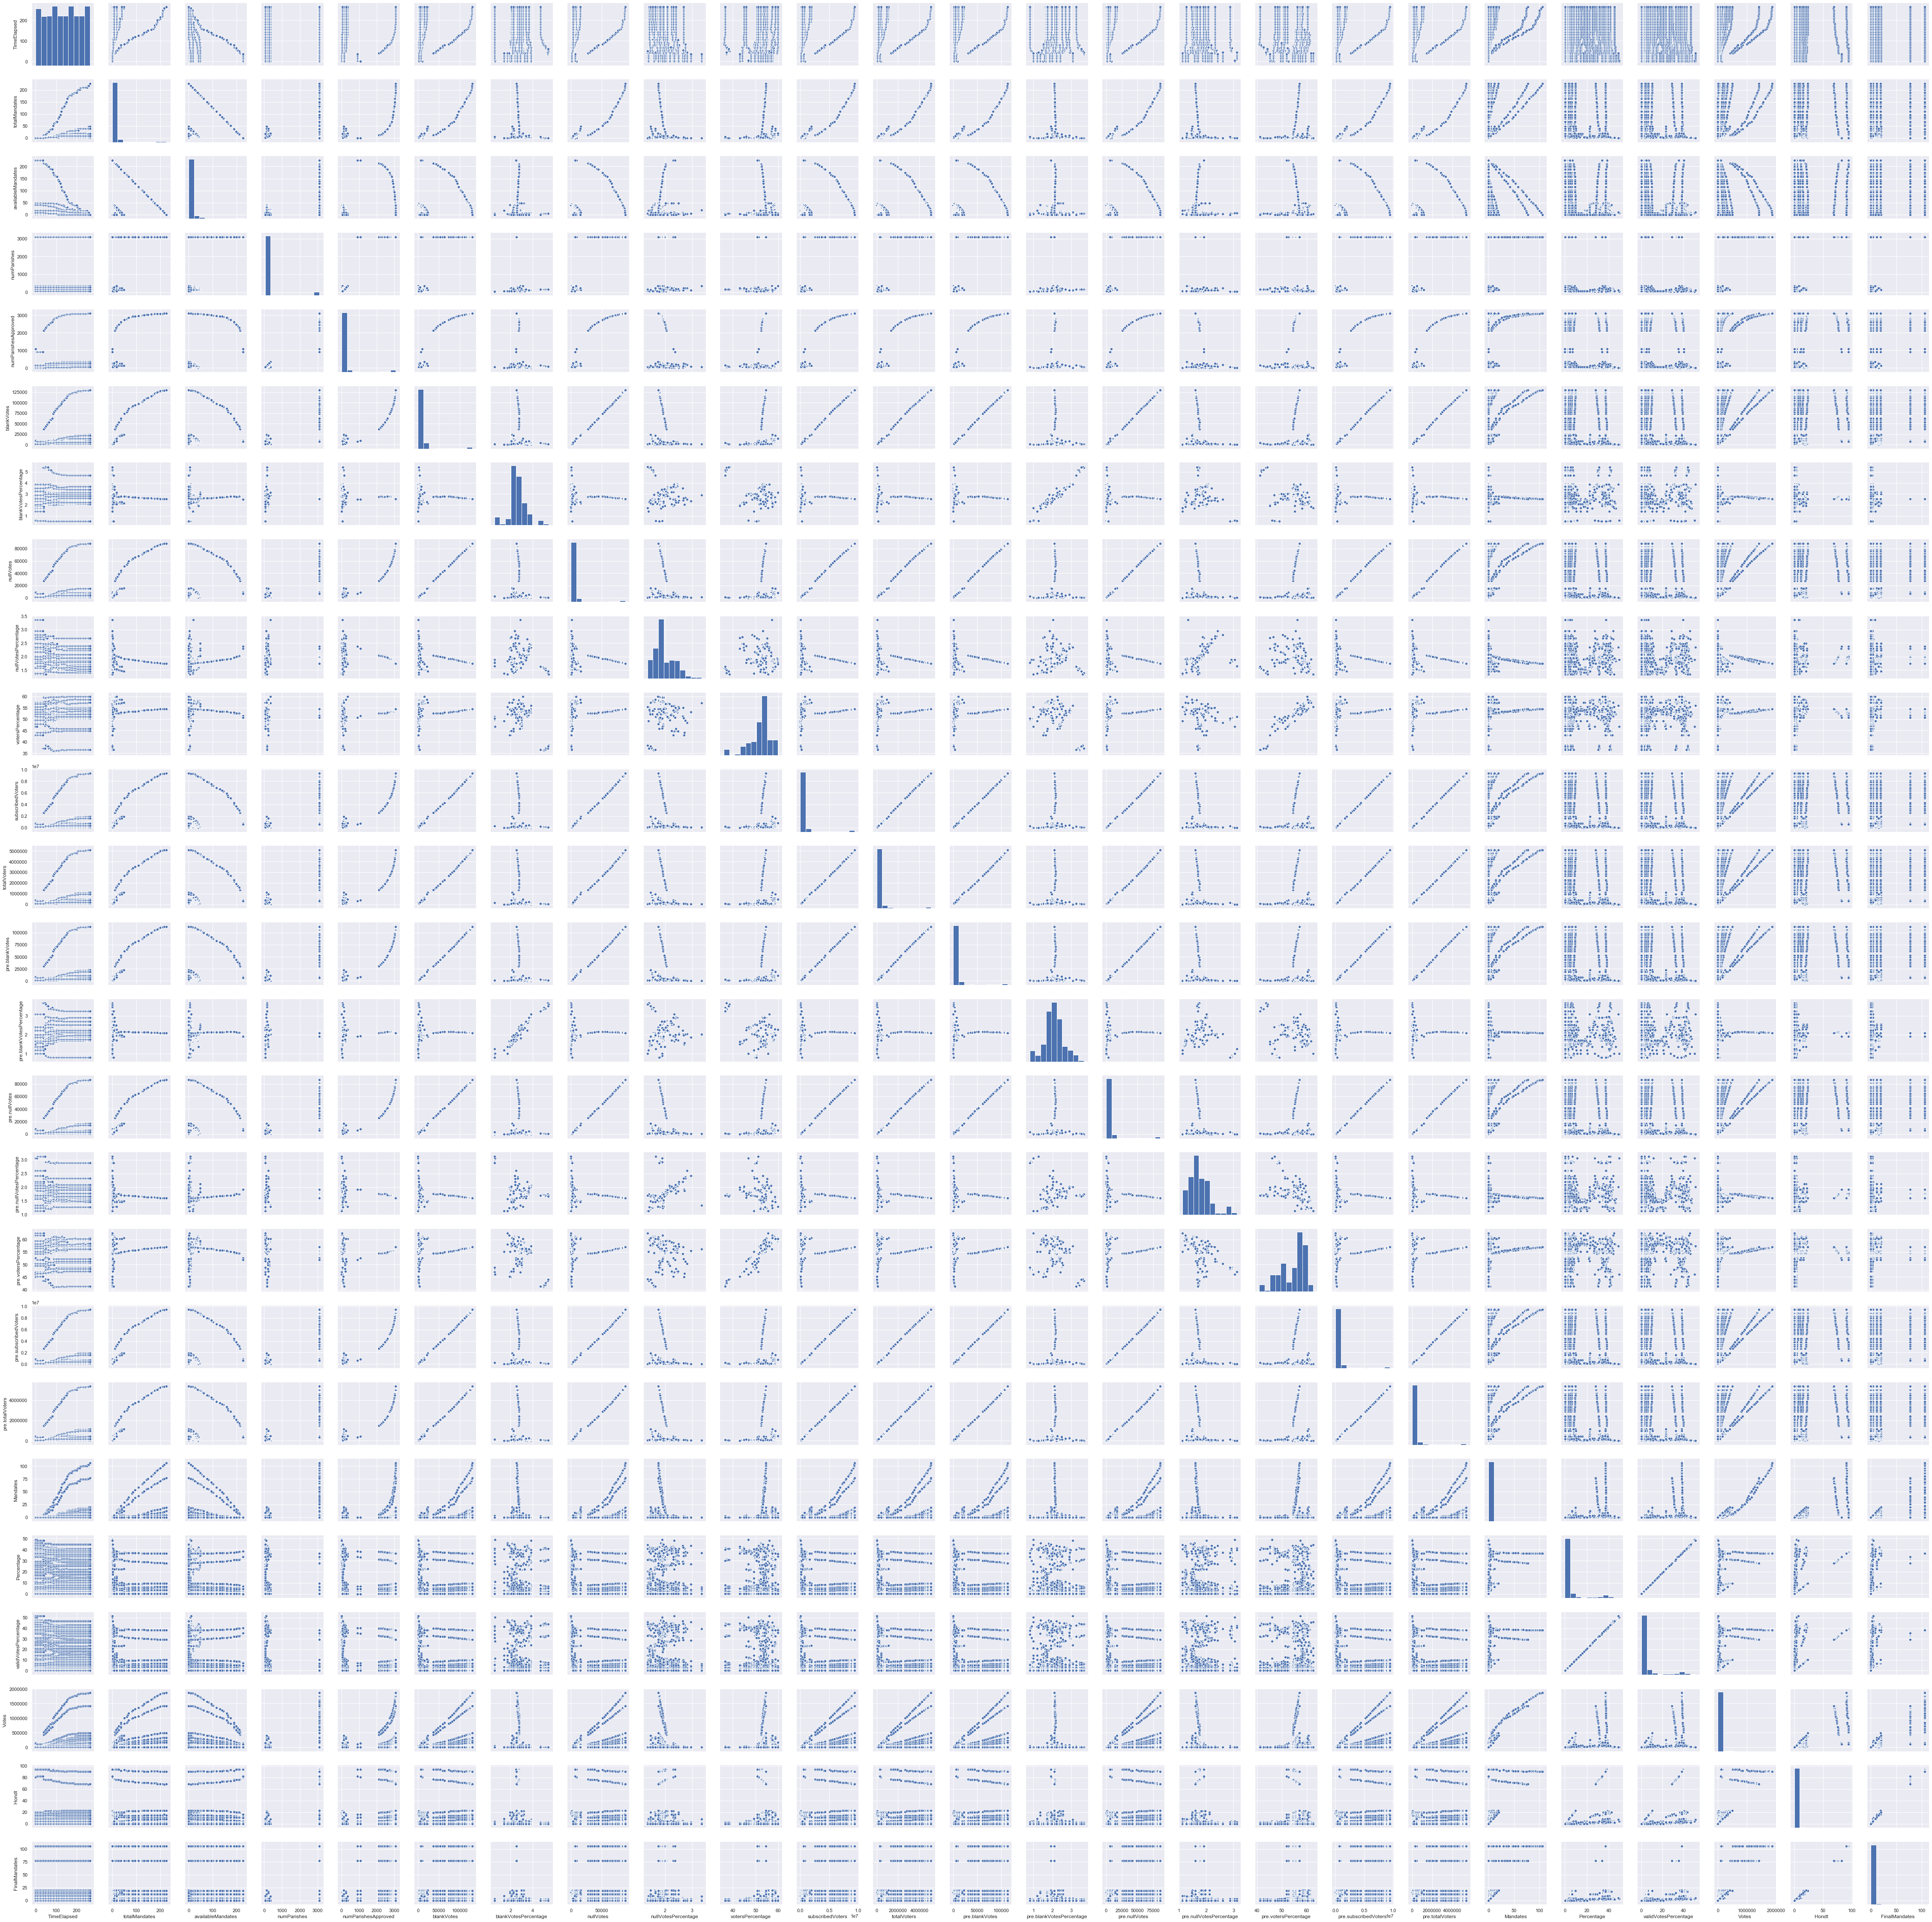

In [39]:
sns.pairplot(df)

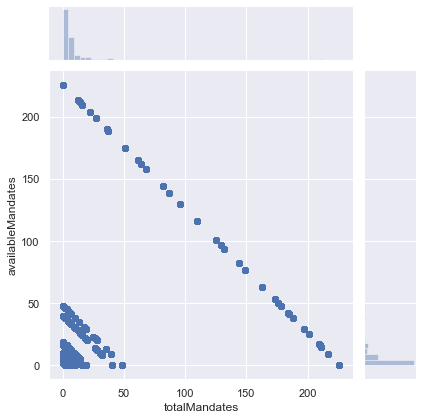

In [40]:
sns.jointplot('totalMandates','availableMandates',height=6,ratio=5,space=.2,data=df,kind='scatter')

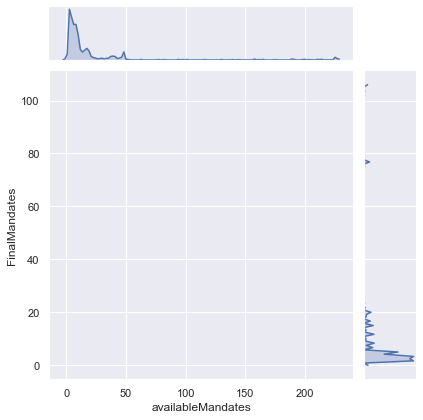

In [41]:
sns.jointplot('availableMandates','FinalMandates',height=6,ratio=5,space=.2,data=df,kind='kde')

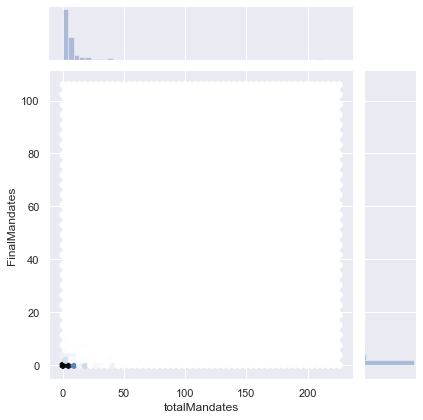

In [42]:
sns.jointplot('totalMandates','FinalMandates',height=6,ratio=5,space=.2,data=df,kind='hex')

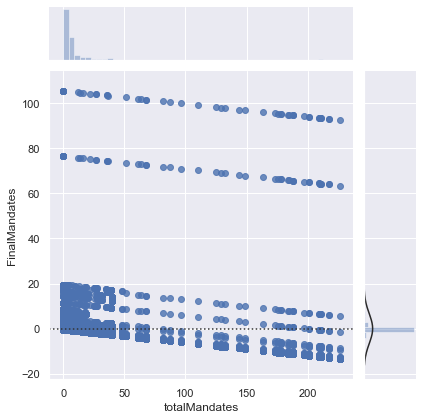

In [43]:
sns.jointplot('totalMandates','FinalMandates',height=6,ratio=5,space=.2,data=df,kind='resid')

In [15]:
df.head()

TimeElapsed                 time        territoryName  totalMandates  \
0            0  2019-10-06 20:10:02  Território Nacional              0   
1            0  2019-10-06 20:10:02  Território Nacional              0   
2            0  2019-10-06 20:10:02  Território Nacional              0   
3            0  2019-10-06 20:10:02  Território Nacional              0   
4            0  2019-10-06 20:10:02  Território Nacional              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   
2                226         3092                 1081        9652   
3                226         3092                 1081        9652   
4                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                   2.5       8874  ...                 52.66   
1                   2.5       8874  ...                 52.66   
2                   2.5       8874  ...                 52.66   
3                   2.5       8874  ...                 52.66   
4                   2.5       8874  ...                 52.66   

   pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                813743           428546       PS         0       38.29   
1                813743           428546  PPD/PSD         0       33.28   
2                813743           428546     B.E.         0        6.81   
3                813743           428546   CDS-PP         0        4.90   
4                813743           428546  PCP-PEV         0        4.59   

   validVotesPercentage   Votes  Hondt  FinalMandates  
0                 40.22  147993     94            106  
1                 34.95  128624     81             77  
2                  7.15   26307     16             19  
3                  5.14   18923     12              5  
4                  4.83   17757     11             12  

[5 rows x 28 columns]

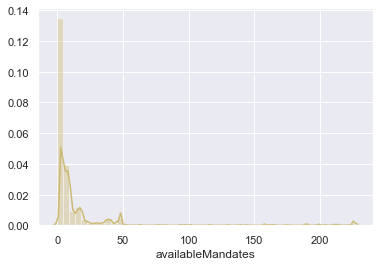

In [44]:
sns.distplot(df['availableMandates'],color='y')

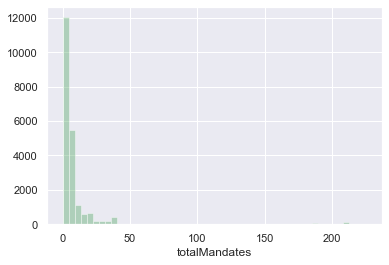

In [45]:
sns.distplot(df['totalMandates'],color='g',kde=False)

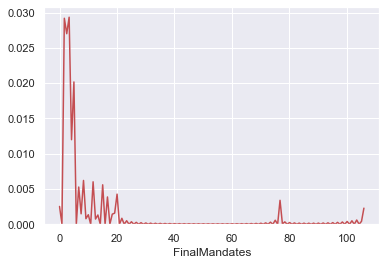

In [46]:
sns.distplot(df['FinalMandates'],color='r',hist=False)

In [219]:
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

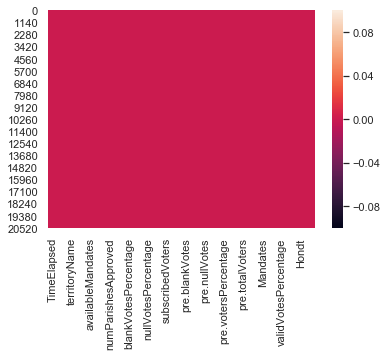

In [220]:
sns.heatmap(df.isnull())

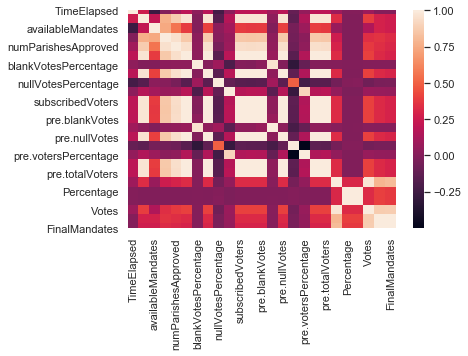

In [49]:
sns.heatmap(df.corr())

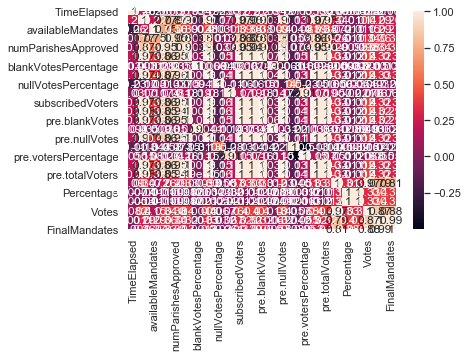

In [50]:
sns.heatmap(df.corr(),annot=True)

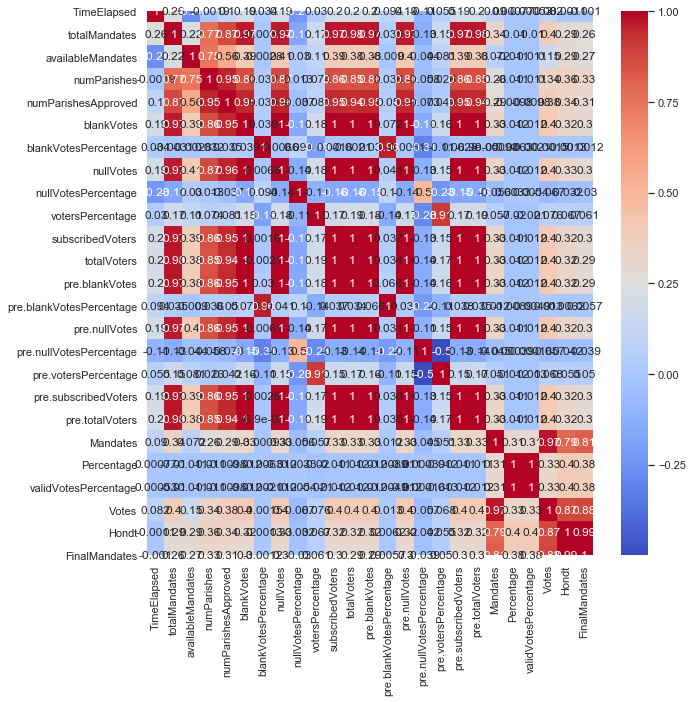

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [221]:
df.head()

TimeElapsed                 time        territoryName  totalMandates  \
0            0  2019-10-06 20:10:02  Território Nacional              0   
1            0  2019-10-06 20:10:02  Território Nacional              0   
2            0  2019-10-06 20:10:02  Território Nacional              0   
3            0  2019-10-06 20:10:02  Território Nacional              0   
4            0  2019-10-06 20:10:02  Território Nacional              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   
2                226         3092                 1081        9652   
3                226         3092                 1081        9652   
4                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                   2.5       8874  ...                 52.66   
1                   2.5       8874  ...                 52.66   
2                   2.5       8874  ...                 52.66   
3                   2.5       8874  ...                 52.66   
4                   2.5       8874  ...                 52.66   

   pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                813743           428546       PS         0       38.29   
1                813743           428546  PPD/PSD         0       33.28   
2                813743           428546     B.E.         0        6.81   
3                813743           428546   CDS-PP         0        4.90   
4                813743           428546  PCP-PEV         0        4.59   

   validVotesPercentage   Votes  Hondt  FinalMandates  
0                 40.22  147993     94            106  
1                 34.95  128624     81             77  
2                  7.15   26307     16             19  
3                  5.14   18923     12              5  
4                  4.83   17757     11             12  

[5 rows x 28 columns]

In [222]:
import datetime as dt

In [223]:
df['time']=pd.to_datetime(df['time'])
df['time']=df['time'].map(dt.datetime.toordinal)
df.head()

TimeElapsed    time        territoryName  totalMandates  availableMandates  \
0            0  737338  Território Nacional              0                226   
1            0  737338  Território Nacional              0                226   
2            0  737338  Território Nacional              0                226   
3            0  737338  Território Nacional              0                226   
4            0  737338  Território Nacional              0                226   

   numParishes  numParishesApproved  blankVotes  blankVotesPercentage  \
0         3092                 1081        9652                   2.5   
1         3092                 1081        9652                   2.5   
2         3092                 1081        9652                   2.5   
3         3092                 1081        9652                   2.5   
4         3092                 1081        9652                   2.5   

   nullVotes  ...  pre.votersPercentage  pre.subscribedVoters  \
0       8874  ...                 52.66                813743   
1       8874  ...                 52.66                813743   
2       8874  ...                 52.66                813743   
3       8874  ...                 52.66                813743   
4       8874  ...                 52.66                813743   

   pre.totalVoters    Party  Mandates  Percentage  validVotesPercentage  \
0           428546       PS         0       38.29                 40.22   
1           428546  PPD/PSD         0       33.28                 34.95   
2           428546     B.E.         0        6.81                  7.15   
3           428546   CDS-PP         0        4.90                  5.14   
4           428546  PCP-PEV         0        4.59                  4.83   

    Votes  Hondt  FinalMandates  
0  147993     94            106  
1  128624     81             77  
2   26307     16             19  
3   18923     12              5  
4   17757     11             12  

[5 rows x 28 columns]

In [224]:
df.skew()

TimeElapsed                 -0.005496
time                         1.971970
totalMandates                5.150031
availableMandates            5.131572
numParishes                  3.920433
numParishesApproved          4.238343
blankVotes                   4.521940
blankVotesPercentage         0.069627
nullVotes                    4.520945
nullVotesPercentage          0.855419
votersPercentage            -1.158029
subscribedVoters             4.568797
totalVoters                  4.541364
pre.blankVotes               4.551489
pre.blankVotesPercentage     0.021609
pre.nullVotes                4.563235
pre.nullVotesPercentage      1.231109
pre.votersPercentage        -0.779289
pre.subscribedVoters         4.565085
pre.totalVoters              4.548030
Mandates                    16.576658
Percentage                   2.542328
validVotesPercentage         2.543122
Votes                       13.940573
Hondt                       11.489315
FinalMandates               12.402865
dtype: float

In [225]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [226]:
skew=('time','totalMandates','availableMandates','numParishes','numParishesApproved','blankVotes','nullVotes','votersPercentage','subscribedVoters','totalVoters','pre.blankVotes','pre.nullVotes','pre.nullVotesPercentage','pre.subscribedVoters','pre.totalVoters','Mandates','Percentage','validVotesPercentage','Votes','Hondt','FinalMandates')

for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]= np.log1p(df[col])

In [227]:
df.skew()

TimeElapsed                -0.005496
time                        0.000000
totalMandates               0.673353
availableMandates           0.739482
numParishes                 1.724389
numParishesApproved         0.363008
blankVotes                 -0.132151
blankVotesPercentage        0.069627
nullVotes                  -0.033397
nullVotesPercentage         0.855419
votersPercentage           -1.158029
subscribedVoters            0.019051
totalVoters                 0.091477
pre.blankVotes             -0.043120
pre.blankVotesPercentage    0.021609
pre.nullVotes              -0.019415
pre.nullVotesPercentage     0.786357
pre.votersPercentage       -0.779289
pre.subscribedVoters        0.021921
pre.totalVoters             0.094050
Mandates                    4.368206
Percentage                  1.416849
validVotesPercentage        1.404150
Votes                       0.367201
Hondt                       3.093717
FinalMandates               3.196053
dtype: float64

TimeElapsed                    AxesSubplot(0.125,0.749828;0.110714x0.130172)
time                        AxesSubplot(0.257857,0.749828;0.110714x0.130172)
totalMandates               AxesSubplot(0.390714,0.749828;0.110714x0.130172)
availableMandates           AxesSubplot(0.523571,0.749828;0.110714x0.130172)
numParishes                 AxesSubplot(0.656429,0.749828;0.110714x0.130172)
numParishesApproved         AxesSubplot(0.789286,0.749828;0.110714x0.130172)
blankVotes                     AxesSubplot(0.125,0.593621;0.110714x0.130172)
blankVotesPercentage        AxesSubplot(0.257857,0.593621;0.110714x0.130172)
nullVotes                   AxesSubplot(0.390714,0.593621;0.110714x0.130172)
nullVotesPercentage         AxesSubplot(0.523571,0.593621;0.110714x0.130172)
votersPercentage            AxesSubplot(0.656429,0.593621;0.110714x0.130172)
subscribedVoters            AxesSubplot(0.789286,0.593621;0.110714x0.130172)
totalVoters                    AxesSubplot(0.125,0.437414;0.110714x0.130172)

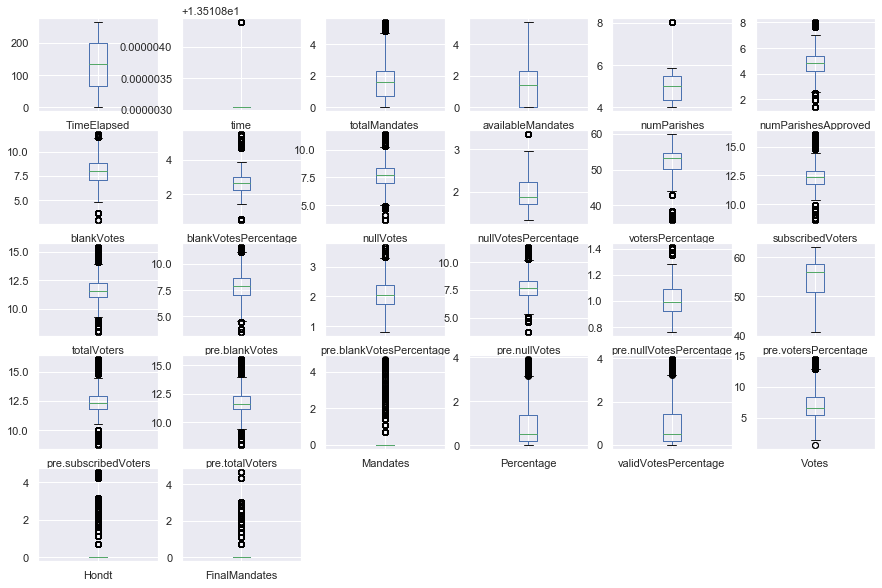

In [228]:
df.plot(kind='box',subplots=True,layout=(5,6),figsize=(15,10))

In [229]:
df.shape

(21643, 28)

In [230]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [231]:
le=LabelEncoder()

In [232]:
df['territoryName'].unique()

array(['Território Nacional', 'Aveiro', 'Beja', 'Braga', 'Bragança',
       'Castelo Branco', 'Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria',
       'Lisboa', 'Madeira', 'Portalegre', 'Porto', 'Santarém', 'Setúbal',
       'Viana do Castelo', 'Vila Real', 'Viseu', 'Açores'], dtype=object)

In [233]:
df['Party'].unique()

array(['PS', 'PPD/PSD', 'B.E.', 'CDS-PP', 'PCP-PEV', 'PAN', 'CH',
       'R.I.R.', 'PCTP/MRPP', 'A', 'L', 'IL', 'JPP', 'NC', 'PDR', 'PNR',
       'PURP', 'PPM', 'MPT', 'PTP', 'MAS'], dtype=object)

In [234]:
df['territoryName']=le.fit_transform(df['territoryName'])
df['Party']=le.fit_transform(df['Party'])

In [235]:
df.head()

TimeElapsed       time  territoryName  totalMandates  availableMandates  \
0            0  13.510803             16            0.0            5.42495   
1            0  13.510803             16            0.0            5.42495   
2            0  13.510803             16            0.0            5.42495   
3            0  13.510803             16            0.0            5.42495   
4            0  13.510803             16            0.0            5.42495   

   numParishes  numParishesApproved  blankVotes  blankVotesPercentage  \
0     8.036897             6.986566    9.175024                   2.5   
1     8.036897             6.986566    9.175024                   2.5   
2     8.036897             6.986566    9.175024                   2.5   
3     8.036897             6.986566    9.175024                   2.5   
4     8.036897             6.986566    9.175024                   2.5   

   nullVotes  ...  pre.votersPercentage  pre.subscribedVoters  \
0   9.090994  ...                 52.66             13.609401   
1   9.090994  ...                 52.66             13.609401   
2   9.090994  ...                 52.66             13.609401   
3   9.090994  ...                 52.66             13.609401   
4   9.090994  ...                 52.66             13.609401   

   pre.totalVoters  Party  Mandates  Percentage  validVotesPercentage  \
0        12.968156     17       0.0    3.670970              3.718924   
1        12.968156     15       0.0    3.534562              3.582129   
2        12.968156      1       0.0    2.055405              2.098018   
3        12.968156      2       0.0    1.774952              1.814825   
4        12.968156     11       0.0    1.720979              1.763017   

       Votes     Hondt  FinalMandates  
0  11.904927  4.553877       4.672829  
1  11.764656  4.406719       4.356709  
2  10.177628  2.833213       2.995732  
3   9.848186  2.564949       1.791759  
4   9.784591  2.484907       2.564949  

[5 rows x 28 columns]

In [236]:
x=df.iloc[:,0:-1]
x.shape

(21643, 27)

In [237]:
y=df.iloc[:,-1]
y.head()

0    4.672829
1    4.356709
2    2.995732
3    1.791759
4    2.564949
Name: FinalMandates, dtype: float64

In [238]:
scale=StandardScaler()

In [239]:
x=scale.fit_transform(x)

In [240]:
y=le.fit_transform(y)

In [241]:
models=[KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]

In [242]:
max_r2_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=r_state)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        r2_value=r2_score(y_test,predm)
        print('R2 score correspond to random state',r_state ,'is',r2_value)
        if r2_value>max_r2_score:
            max_r2_score=r2_value
            final_state=r_state
            final_model=m
print()
print()
print()
print('Maximum r2 score correspond to random state',final_state,'is',max_r2_score,'and model is',final_model)

R2 score correspond to random state 40 is 0.9961688169748214
R2 score correspond to random state 40 is 0.9987910011491372
R2 score correspond to random state 40 is 0.9993484839525906
R2 score correspond to random state 41 is 0.9968801623233351
R2 score correspond to random state 41 is 0.9995590958625403
R2 score correspond to random state 41 is 0.9995873137273377
R2 score correspond to random state 42 is 0.996523308984004
R2 score correspond to random state 42 is 0.9998815840934606
R2 score correspond to random state 42 is 0.999826718056764
R2 score correspond to random state 43 is 0.9937812959766275
R2 score correspond to random state 43 is 0.9982111884361303
R2 score correspond to random state 43 is 0.9991751591122157
R2 score correspond to random state 44 is 0.9934202311087614
R2 score correspond to random state 44 is 0.9994620314743012
R2 score correspond to random state 44 is 0.9989348223191165
R2 score correspond to random state 45 is 0.9963157060104239
R2 score correspond to ran

In [243]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=42)

In [244]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
preddtr=dtr.predict(x_test)
print(r2_score(y_test,preddtr))
print(mean_squared_error(y_test,preddtr))
print(mean_absolute_error(y_test,preddtr))
print(np.sqrt(mean_absolute_error(y_test,preddtr)))

0.9998815840934606
0.0005774783445620789
0.0005774783445620789
0.02403077910851163


In [245]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.93667861 0.99503098 0.99877339 1.         0.99979223]
0.9860550422062773
0.02475289361622209


In [246]:
from sklearn.externals import joblib

In [247]:
joblib.dump(dtr,'ElectionFile.obj')

['ElectionFile.obj']